In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')

print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [12]:
# The median age (28) 
df['Age'] = df['Age'].fillna(df['Age'].median())

# 1. Check for remaining missing values
print("Missing values before cleaning:\n", df.isnull().sum())

# 2. Fill the two missing 'Embarked' values with the most frequent value (the Mode)
# The mode is found by df['Embarked'].mode()[0]
mode_embarked = df['Embarked'].mode()[0] 
df['Embarked'] = df['Embarked'].fillna(mode_embarked)


Missing values before cleaning:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [13]:
# 'Cabin' has too many missing values (too messy for simple EDA)
#  'Name'and 'Ticket' are unique identifiers and not useful for patterns
df.drop([ 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

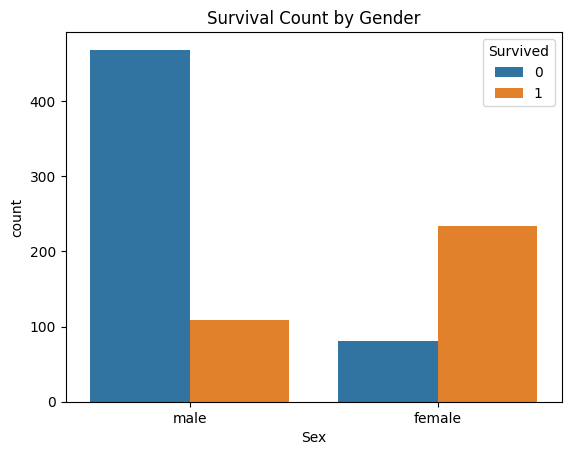

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.show()



In [ ]:
#Insight: Gender was the strongest predictor of survival.
#BLUE-NOT SURVIVED   #ORANGE-SURVIVED
#The majority of female passengers survived, 
#while the vast majority of male passengers perished. 


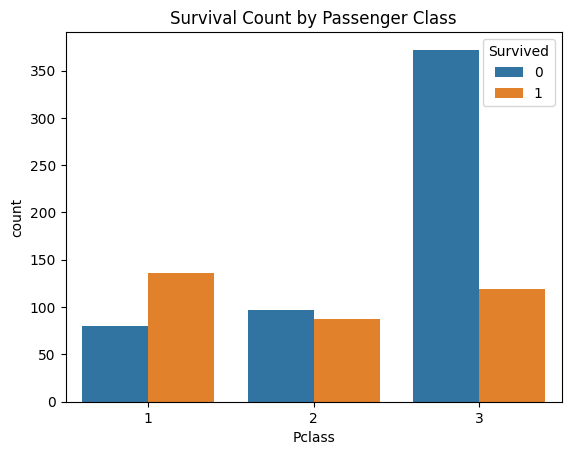

In [15]:
# 2. Survival by Passenger Class (Pclass)
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

In [ ]:
#First Class passengers had the highest survival rate,
#showing that wealth/status strongly influenced outcome.

#Second Class passengers had approximately a 50/50 chance of survival.

#Third Class passengers had the lowest survival rate and accounted for the largest volume of deaths.

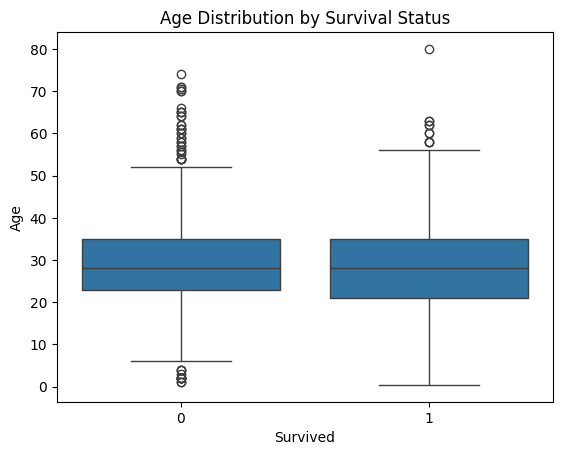

In [16]:
#AGE DISTRIBUTION BY SURVIVAL
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival Status')
plt.show()


In [ ]:
#Median Age: The central line for both groups is nearly identical (approx. 28-29).

#Distribution Range: The middle 50% of the data (the height of the box) also occupies a very similar age range for both.

#Extremes: Both groups show outliers extending down to infancy and up to old age (80).

#When looking at the overall distribution, age is not a strong linear predictor of survival.
#A person's age, on its own, was not a dominant factor compared to gender or passenger class.

In [17]:
# Select only numerical columns for correlation
corr_matrix = df.select_dtypes(include=np.number).corr() 
print(corr_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096688  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [ ]:
# pclass-This is the strongest correlation among these numerical variables.
#The negative sign&(-0.338) confirms that as class number increases (going from 1 to 3), survival decreases.

#There is a moderate positive correlation(0.257).
#passengers who paid a higher fare were more likely to survive ( 1st class passengers).

#The correlation is very close to zero(-0.065) 
#confirming that there is no meaningful linear relationship between a person's age and their survival rate.